In [1]:
#General 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
import joblib

#model
import xgboost as xgb
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,roc_auc_score,precision_recall_curve, average_precision_score, classification_report, confusion_matrix, make_scorer
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

In [2]:
#Data Reading
Full_data = pd.read_csv('F:\Full and Unique Mixed Output/fullandMixed_merged_file.csv')

In [1]:
Full_data.shape

NameError: name 'Full_data' is not defined

In [2]:
#Missing Values
print('number of missing values in MixedBase data:', sum(Full_data.isnull().sum()))

#Duplicate values
print('\n''number of duplicates values in MixedBase data:', Full_data.duplicated().sum())


NameError: name 'Full_data' is not defined

In [4]:
#Dropping duplicates in dataset
Full_data = Full_data.drop_duplicates()

In [3]:
Full_data.shape

NameError: name 'Full_data' is not defined

In [6]:
# sepearte feature and label
X = Full_data.drop('Label', axis='columns')
Y = Full_data['Label']

In [7]:
# label Encoding as Xgboost works for label 0 to sequencially
encoder = LabelEncoder()
Y_encoded = encoder.fit_transform(Y)

In [4]:
#Count of each labels
unique_values, counts = np.unique(Y_encoded,return_counts=True)

for value, count in zip(unique_values,counts): print(f"value: {value}, Count: {count}")

NameError: name 'np' is not defined

In [9]:
# mapping from encoded values to original labels
label_mapping = {encoded: original for encoded, original in zip(Y_encoded,Y)}

#Location of mapping 
Full_model_label_mapping_path = 'C:\\Users\\cr245297\\Documents\\Python Scripts\\full_model_label_mapping.joblib'

# Save the label mapping to a joblib file
joblib.dump(label_mapping, Full_model_label_mapping_path)

# load the saved model from the joblib file
label_mapping = joblib.load(Full_model_label_mapping_path)

In [10]:
#splitting the dataset into train and test 
X_train, X_test, Y_train, Y_test = train_test_split(X,Y_encoded,test_size=0.05, random_state =42, stratify = Y_encoded)

In [11]:
#XG Boost model
xgb_model = xgb.XGBClassifier(
    max_depth = 3,
    subsample = 0.8,
    n_estimators = 1000,
    learning_rate = 0.1,
    objective = "multi:softmax",
    num_class = 6,
    n_jobs = -1,
    random_state = 42
    )

In [12]:
#Random Forest Model
RandomForest_model = RandomForestClassifier(
    n_estimators=1000,
    n_jobs=-1,
    random_state=52,
    class_weight='balanced'
)

In [13]:
#votiing classifier with probability based voting 
voting_classifier = VotingClassifier(estimators=[('xgb', xgb_model),('rf', RandomForest_model)],voting='soft')

In [14]:
#train the voting_classifier on the training data
voting_classifier.fit(X_train,Y_train)

VotingClassifier(estimators=[('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_ra...
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=3,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=1000, n_jobs=-1,
                                            num_class=6, num_parallel_tree=None,
                                            objective='multi:softmax', ...)),
                             ('rf',
                              RandomForestClassifier(class_weight='balanced',
                                                     n_estimators=1000,
                                                     n_jobs=-1,
                                                     random_state=52))],
                 voting='soft')

In [ ]:
# saving the model 

# file path for saving the model
Full_model_path = 'C:\\Users\\cr245297\\Documents\\Python Scripts\\Full_model_xgbRF.joblib'

# save the modelto the path 
joblib.dump(voting_classifier, Full_model_path)

# load the saved model from the joblib file
Full_model_loaded = joblib.load(Full_model_path)

In [19]:
# prediction
Y_pred = Full_model_loaded.predict(X_test)

In [20]:
# Evaluate the model's performance
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    323518
           1       1.00      1.00      1.00    295255
           2       1.00      1.00      1.00    415215
           3       1.00      1.00      1.00    249522

    accuracy                           1.00   1283510
   macro avg       1.00      1.00      1.00   1283510
weighted avg       1.00      1.00      1.00   1283510



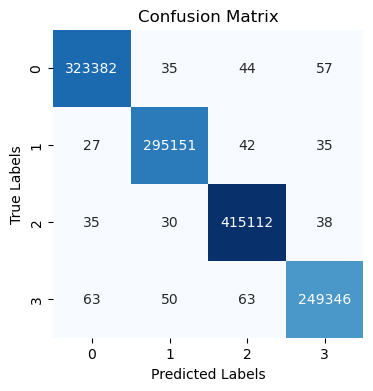

In [21]:
#compute the confusion metrix
cm = confusion_matrix(Y_test,Y_pred)

#display using heatmap
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [22]:
# Calculate class-wise precision, recall, and F1-score
precision = precision_score(Y_test, Y_pred, average=None)
recall = recall_score(Y_test, Y_pred, average=None)
f1 = f1_score(Y_test, Y_pred, average=None)


# Calculate class-wise accuracy

class_accuracy = []
for class_label in range(len(precision)):
    class_samples = (Y_test == class_label).sum()
    class_correct = np.logical_and(Y_test == Y_pred, Y_test == class_label).sum()
    class_accuracy.append(class_correct / class_samples)

# Print the class-wise metrics
for class_label in range(len(precision)):
   print(f"Class {class_label}:")
   print(f"Accuracy: {class_accuracy[class_label]}")
   print(f"Precision: {precision[class_label]}")
   print(f"Recall: {recall[class_label]}")
   print(f"F1-Score: {f1[class_label]}")
   print()

Class 0:
Accuracy: 0.9995796215357414
Precision: 0.9996136095973194
Recall: 0.9995796215357414
F1-Score: 0.9995966152776168

Class 1:
Accuracy: 0.999647762103944
Precision: 0.9996105206830451
Recall: 0.999647762103944
F1-Score: 0.9996291410466351

Class 2:
Accuracy: 0.9997519357441326
Precision: 0.9996411895169544
Recall: 0.9997519357441326
F1-Score: 0.9996965595634312

Class 3:
Accuracy: 0.999294651373426
Precision: 0.9994789077907293
Recall: 0.999294651373426
F1-Score: 0.9993867710892629



In [23]:
# function to decode the encoded values

def decode_labels(encoded_values, label_mapping):

    decoded_values = [label_mapping[encoded] for encoded in encoded_values]

    return decoded_values


# Using the decoding function to get the decoded predictions

Y_pred_decoded = decode_labels(Y_pred, label_mapping)



In [5]:
unique_values, counts = np.unique(Y_pred_decoded,return_counts=True)

for value, count in zip(unique_values,counts): print(f"value: {value}, Count: {count}")

NameError: name 'np' is not defined

In [6]:
unique_values, counts = np.unique(Y_pred,return_counts=True)

for value, count in zip(unique_values,counts): print(f"value: {value}, Count: {count}")

NameError: name 'np' is not defined

In [7]:
unique_values, counts = np.unique(Y_test,return_counts=True)

for value, count in zip(unique_values,counts): print(f"value: {value}, Count: {count}")

NameError: name 'np' is not defined